In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1')
df2 = pd.read_csv('takehome_user_engagement.csv')

In [4]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
df['creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
#adapted from wzhongny github : https://github.com/wzhongny 
df2 = df2.groupby(['user_id', pd.Grouper(key = 'time_stamp', freq='W')]).sum().reset_index()
df2.head()

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-12-01,1
3,2,2013-12-15,1
4,2,2013-12-29,1


In [11]:
df2['adopted'] = np.where(df2['visited'] >= 3, 1, 0)
df2.head()

,user_id,time_stamp,visited,adopted
0,1,2014-04-27,1,0
1,2,2013-11-17,1,0
2,2,2013-12-01,1,0
3,2,2013-12-15,1,0
4,2,2013-12-29,1,0


In [12]:
df2 = df2[['user_id', 'visited', 'adopted']].drop_duplicates()
df2.head()

,user_id,visited,adopted
0,1,1,0
1,2,1,0
7,2,3,1
8,2,2,0
12,3,1,0


In [13]:
users = pd.DataFrame(df2['user_id'].value_counts()).reset_index()
users = users.rename(columns={'index':'user_id', 'user_id':'idcount'})
users.head()

,user_id,idcount
0,4143,7
1,4965,7
2,5552,7
3,7375,7
4,1434,7


In [14]:
engagement = pd.merge(df2, users, left_on='user_id', right_on='user_id')

In [15]:
engagement = engagement.drop(engagement.loc[(engagement['idcount']>1) & (engagement['adopted']==0)].index)

In [16]:
engagement = engagement[['user_id', 'adopted']].drop_duplicates()
engagement['user_id'].value_counts()

2047     1
3475     1
11607    1
5464     1
5472     1
        ..
2788     1
4839     1
8937     1
2796     1
2049     1
Name: user_id, Length: 8317, dtype: int64

In [17]:
df = pd.merge(df, engagement, left_on='object_id', right_on='user_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2,2014-03-31 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,0
3,4,2013-05-22 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4,0
4,5,2013-01-22 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 8316
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8317 non-null   int64         
 1   creation_time               8317 non-null   datetime64[ns]
 2   name                        8317 non-null   object        
 3   email                       8317 non-null   object        
 4   creation_source             8317 non-null   object        
 5   last_session_creation_time  8317 non-null   float64       
 6   opted_in_to_mailing_list    8317 non-null   int64         
 7   enabled_for_marketing_drip  8317 non-null   int64         
 8   org_id                      8317 non-null   int64         
 9   invited_by_user_id          4476 non-null   float64       
 10  user_id                     8317 non-null   int64         
 11  adopted                     8317 non-null   int32       

<AxesSubplot:>

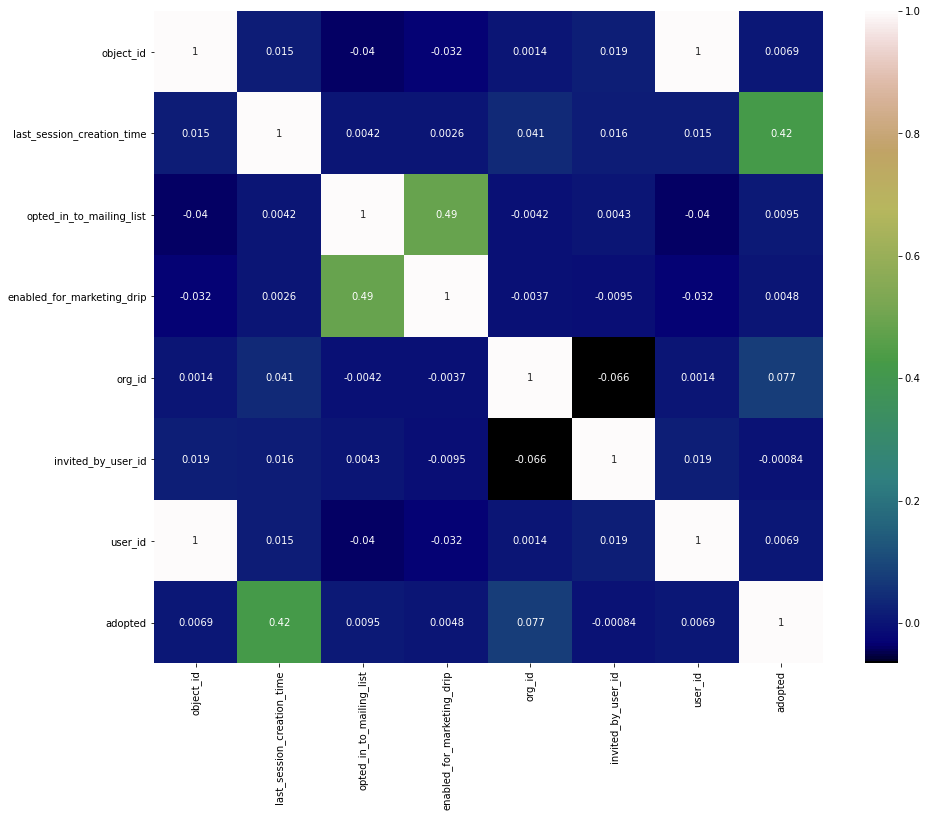

In [19]:
plt.figure(figsize=(15, 12))
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='gist_earth')

In [20]:
cm['adopted'].sort_values(ascending=False)

adopted                       1.000000
last_session_creation_time    0.421423
org_id                        0.076552
opted_in_to_mailing_list      0.009473
user_id                       0.006854
object_id                     0.006854
enabled_for_marketing_drip    0.004813
invited_by_user_id           -0.000842
Name: adopted, dtype: float64

In [21]:
df = df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476 entries, 0 to 8314
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   4476 non-null   int64         
 1   creation_time               4476 non-null   datetime64[ns]
 2   name                        4476 non-null   object        
 3   email                       4476 non-null   object        
 4   creation_source             4476 non-null   object        
 5   last_session_creation_time  4476 non-null   float64       
 6   opted_in_to_mailing_list    4476 non-null   int64         
 7   enabled_for_marketing_drip  4476 non-null   int64         
 8   org_id                      4476 non-null   int64         
 9   invited_by_user_id          4476 non-null   float64       
 10  user_id                     4476 non-null   int64         
 11  adopted                     4476 non-null   int32       

In [23]:
X = df[['last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'object_id', 'user_id', 'invited_by_user_id']]
y = df['adopted']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_dt = RandomizedSearchCV(dt, {'max_depth':np.arange(1,7)}, cv=5)
cv_dt.fit(X_train, y_train)

y_pred_dt = cv_dt.predict(X_test)

print('roc_auc_score:', roc_auc_score(y_test, y_pred_dt))    
print(classification_report(y_test, y_pred_dt))

C:\Users\marka\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


roc_auc_score: 0.8499693627450979
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1088
           1       0.71      0.77      0.74       255

    accuracy                           0.90      1343
   macro avg       0.83      0.85      0.84      1343
weighted avg       0.90      0.90      0.90      1343



In [27]:
rf = RandomForestClassifier()
rf_para={'n_estimators':np.arange(5,100), 'max_depth':np.arange(1,15)}

cv_rf = RandomizedSearchCV(rf, rf_para, cv=5)

cv_rf.fit(X_train, y_train)

y_pred_rf = cv_rf.predict(X_test)

print('roc_auc_score:', roc_auc_score(y_test, y_pred_rf))    
print(classification_report(y_test, y_pred_rf))

roc_auc_score: 0.8072610294117646
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1088
           1       0.74      0.67      0.70       255

    accuracy                           0.89      1343
   macro avg       0.83      0.81      0.82      1343
weighted avg       0.89      0.89      0.89      1343



In [30]:
feature_importance = pd.DataFrame({'importance': cv_rf.best_estimator_.feature_importances_}, index=X_train.columns)
feature_importance.sort_values('importance', ascending=False)

,importance
last_session_creation_time,0.735495
object_id,0.069663
invited_by_user_id,0.061328
org_id,0.059541
user_id,0.059095
enabled_for_marketing_drip,0.007663
opted_in_to_mailing_list,0.007214
